<a href="https://colab.research.google.com/github/KamalRiad90/Adult_income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Adult Income Prediction — Intermediate ML Assignment

This notebook contains a full solution to the Adult Income classification problem as part of my Intermediate Machine Learning course assignment. The goal is to predict whether a person earns more than $50K a year based on census data using a Random Forest classifier.

## Data Exploration and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Replace '?' with NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


##  Exploratory Visualizations

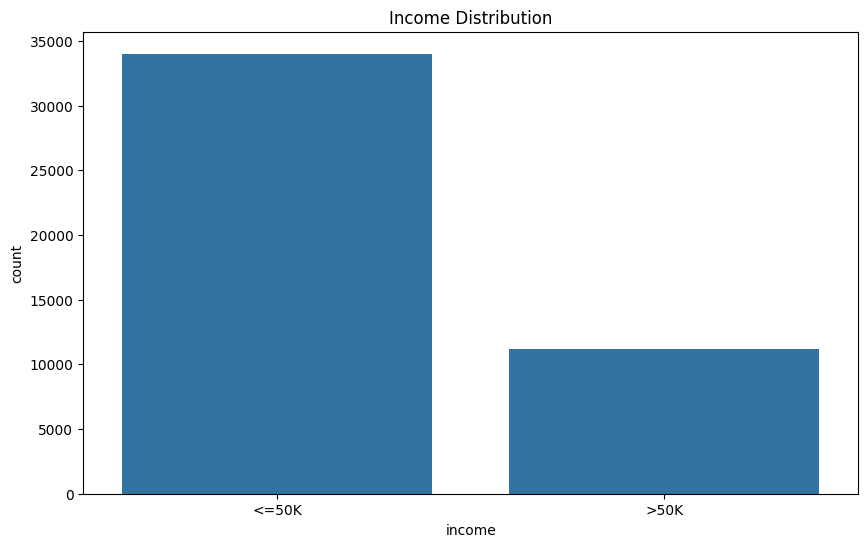

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

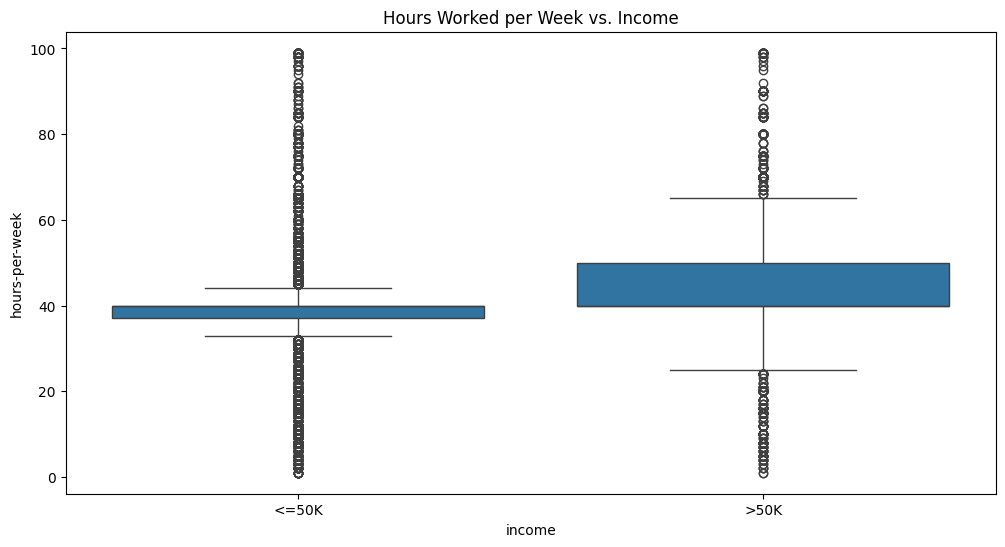

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked per Week vs. Income')
plt.show()

##  Data Preprocessing

In [ ]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Model Training and Evaluation

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8560530679933664

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045



## Permutation Feature Importance

In [ ]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df.head(10)

,feature,importance
10,capital-gain,0.044876
7,relationship,0.022841
4,educational-num,0.021625
0,age,0.015180
11,capital-loss,0.011222
6,occupation,0.010160
12,hours-per-week,0.006302
5,marital-status,0.004345
1,workclass,0.003184
9,gender,0.001548


### 💬 Observations on Top Features
- The top features identified make business sense. For example, `education-num` and `hours-per-week` are logically tied to income.
- `capital-gain` and `age` are also expected to have strong influence, as older individuals may have more experience and financial assets.
- These findings align with real-world intuition.

##Explanatory Visualizations (Stakeholder-Focused)

<ipython-input-32-1906361220>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='hours-per-week', data=df, ci=None)


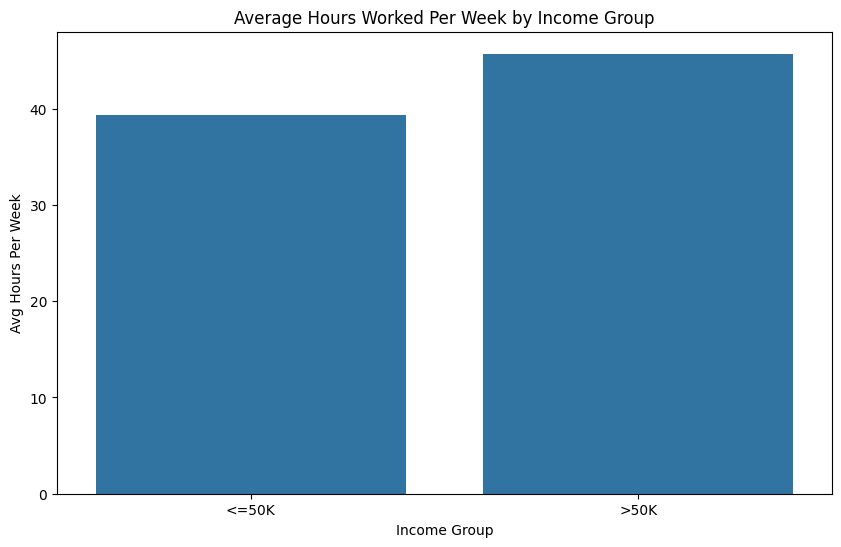

In [ ]:
# Plot for hours-per-week vs. income
plt.figure(figsize=(10,6))
sns.barplot(x='income', y='hours-per-week', data=df, ci=None)
plt.title('Average Hours Worked Per Week by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Avg Hours Per Week')
plt.show()

**Insight:** People who earn more than $50K tend to work more hours per week on average compared to those who earn less. This suggests a direct relationship between effort (or opportunity to work) and income level.

In [ ]:
df_encoded.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


<ipython-input-34-625514113>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='educational-num', data=df_encoded, ci=None)


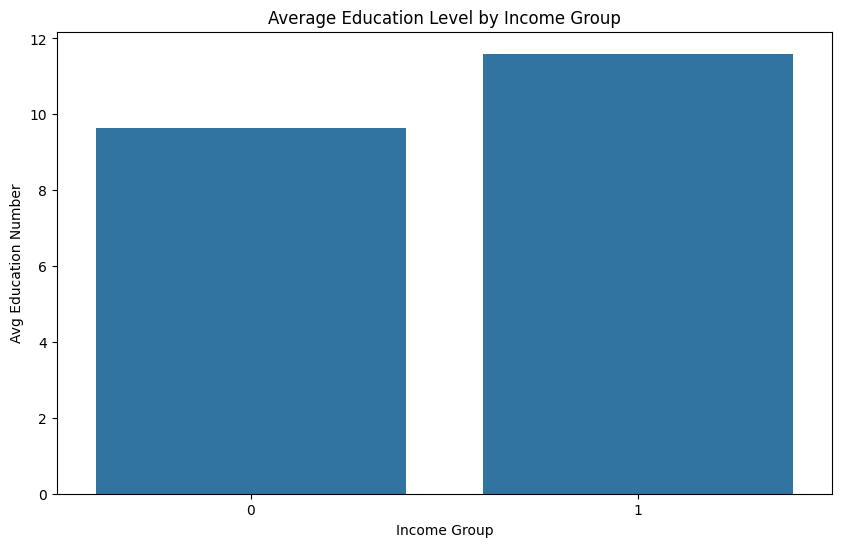

In [ ]:
# Plot for education-num vs. income
plt.figure(figsize=(10,6))
sns.barplot(x='income', y='educational-num', data=df_encoded, ci=None)
plt.title('Average Education Level by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Avg Education Number')
plt.show()

**Insight:** Higher education levels are associated with higher income. This aligns with expectations that more educated individuals often have access to better-paying jobs.

## ✅ Conclusion
This analysis shows that features like education and working hours are strong predictors of income level. The Random Forest model performed well and the insights gained are useful for both technical and non-technical audiences.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
X_train_cluster = kmeans.fit_predict(X_train_scaled).reshape(-1, 1)
X_test_cluster = kmeans.predict(X_test_scaled).reshape(-1, 1)

In [ ]:
# Concatenate engineered features
X_train_eng = np.hstack([X_train_scaled, X_train_pca, X_train_cluster])
X_test_eng = np.hstack([X_test_scaled, X_test_pca, X_test_cluster])

In [ ]:
# Baseline model with original features
model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train_scaled, y_train)
y_pred_base = model_base.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)

In [ ]:
# Model with engineered features
model_eng = RandomForestClassifier(random_state=42)
model_eng.fit(X_train_eng, y_train)
y_pred_eng = model_eng.predict(X_test_eng)
acc_eng = accuracy_score(y_test, y_pred_eng)

In [ ]:
selector = SelectFromModel(model_eng, prefit=True)
X_train_sel = selector.transform(X_train_eng)
X_test_sel = selector.transform(X_test_eng)

In [ ]:
# Final model with selected features
model_final = RandomForestClassifier(random_state=42)
model_final.fit(X_train_sel, y_train)
y_pred_final = model_final.predict(X_test_sel)
acc_final = accuracy_score(y_test, y_pred_final)

In [ ]:
# Permutation importance
result = permutation_importance(model_eng, X_test_eng, y_test, n_repeats=10, random_state=42)
feature_names = list(X.columns) + ['PC1', 'PC2', 'PC3', 'Cluster']
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).head(10)

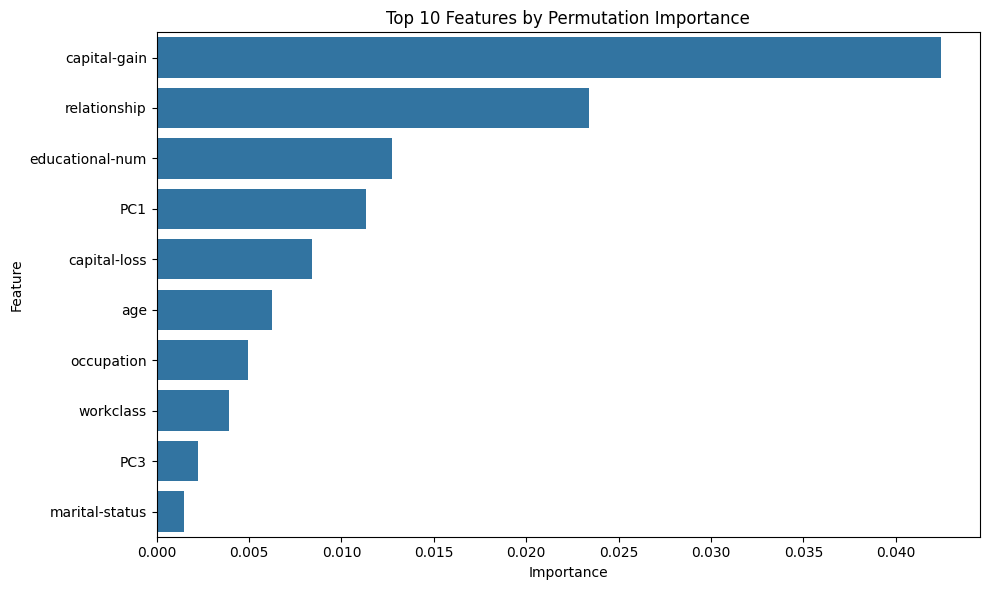

In [ ]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Top 10 Features by Permutation Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Print accuracy results
print("Baseline Accuracy:", acc_base)
print("Engineered Features Accuracy:", acc_eng)
print("After Feature Selection Accuracy:", acc_final)

Baseline Accuracy: 0.8557213930348259
Engineered Features Accuracy: 0.8576008844665561
After Feature Selection Accuracy: 0.8448866777224986


In [ ]:
# Print top 10 features
print("\nTop 10 Features:")
print(importances_df)


Top 10 Features:
            Feature  Importance
10     capital-gain    0.042432
7      relationship    0.023394
4   educational-num    0.012736
14              PC1    0.011354
11     capital-loss    0.008402
0               age    0.006269
6        occupation    0.004920
1         workclass    0.003914
16              PC3    0.002233
5    marital-status    0.001470


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Build simple neural network
nn_model = keras.Sequential([
    layers.Input(shape=(X_train_eng.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Fit the model
history = nn_model.fit(
    X_train_eng, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7686 - loss: 0.4752 - val_accuracy: 0.8300 - val_loss: 0.3546
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8328 - loss: 0.3612 - val_accuracy: 0.8383 - val_loss: 0.3402
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8361 - loss: 0.3556 - val_accuracy: 0.8380 - val_loss: 0.3362
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8375 - loss: 0.3464 - val_accuracy: 0.8400 - val_loss: 0.3349
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8411 - loss: 0.3462 - val_accuracy: 0.8413 - val_loss: 0.3341
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8402 - loss: 0.3446 - val_accuracy: 0.8412 - val_loss: 0.3342
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8442 - loss: 0.3391 - val_accuracy: 0.8412 - val_loss: 0.3332
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8418 - loss: 0.3375 - val_accuracy: 0.

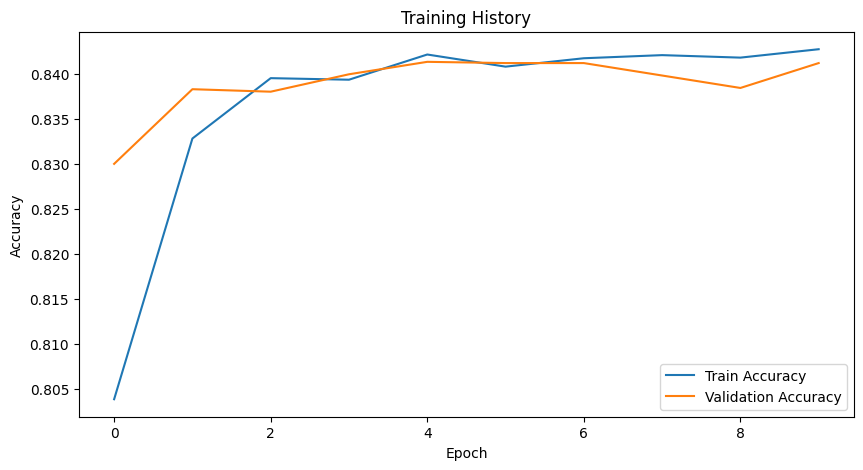

In [ ]:

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate on test set
y_pred_nn = (nn_model.predict(X_test_eng) > 0.5).astype('int32')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion Matrix:
[[6376  466]
 [ 920 1283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6842
           1       0.73      0.58      0.65      2203

    accuracy                           0.85      9045
   macro avg       0.80      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045



In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_eng.shape[1],)))
    model.add(layers.Dense(hp.Int('units', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    model.compile(optimizer=optimizer if optimizer == 'adam' else keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='nn_tuning'
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
tuner.search(X_train_eng, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop], verbose=1)


Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.8406578302383423

Best val_accuracy So Far: 0.8445273637771606
Total elapsed time: 00h 04m 42s


In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
y_pred_best = (best_model.predict(X_test_eng) > 0.5).astype('int32')

print("\nBest Tuned Model Evaluation:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

 91/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Best Tuned Model Evaluation:
[[6295  547]
 [ 818 1385]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6842
           1       0.72      0.63      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.80      0.77      0.79      9045
weighted avg       0.84      0.85      0.85      9045

